# Homework 4: Part 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import pylab, sys
import astropy.units as u
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Question 3: Creating a Lensed Image

We have the lens equation $\beta = \theta - \frac{D_{LS}}{D_s D_L} \cdot \frac{4GM}{c^2 \theta}$ where the Einstein radius is $\theta_E = \frac{D_{LS}}{D_s D_L} \cdot \frac{4GM}{c^2}$, and therefore $\beta = \theta - \frac{\theta_E}{\theta}$

$D_L = $ observer-deflector distance, $D_{LS} =$ deflector-source distance, and $D_S =$ observer-source distance.

The first thing that we need to do is calculate our Einstein radius.

In [35]:
G = 6.67408*(10**-11) #gravitational constant with units of m^3/kg/s^2
c = 3*(10**8) #speed of light in m/s
M = 9*(10**47) #mass of galaxy in kg
Dls = 3*(10**23) #deflector-source distance in m
Ds = 3.086*(10**23) #observer-source distance in m
Dl = .086*(10**23) #observer-deflector distance in m

In [3]:
E = (Dls / (Dl * Ds))*((4*G*M) / (c**2))
print E

0.301771541395


This is just an example of what the $\theta_E$ could be. The parameters will change depending on the object you are observing.

Next we need to define the equations for our Einstein ring, object, and the lensed images of our object.

In [19]:
def circle(Sx, Sy, r0, phi): #Equation for Einstein ring and object 
    return np.array([Sx + r0*np.cos(phi), Sy + r0*np.sin(phi)])

def P(Sx, Sy, r0, phi):
    return np.array([Sx + r0*np.cos(phi), Sy + r0*np.sin(phi)])/LA.norm(np.array([Sx + r0*np.cos(phi), Sy + r0*np.sin(phi)]))

def theta1(Sx, Sy, r0, phi, thetaE):
    return 0.5*(LA.norm(np.array([Sx + r0*np.cos(phi), Sy + r0*np.sin(phi)])) + np.sqrt(np.power(LA.norm(np.array([Sx + r0*np.cos(phi), Sy + r0*np.sin(phi)])),2)+4*thetaE**2))

def theta2(Sx, Sy, r0, phi, thetaE):
    return 0.5*(LA.norm(np.array([Sx + r0*np.cos(phi), Sy + r0*np.sin(phi)])) - np.sqrt(np.power(LA.norm(np.array([Sx + r0*np.cos(phi), Sy + r0*np.sin(phi)])),2)+4*thetaE**2))
  
def lens1(Sx, Sy, r0, phi, thetaE): #Equation for first lensed image of object
    return P(Sx, Sy, r0, phi) * theta1(Sx, Sy, r0, phi, thetaE)
  
def lens2(Sx, Sy, r0, phi, thetaE): #Equation for second lensed image of object
    return P(Sx, Sy, r0, phi) * theta2(Sx, Sy, r0, phi, thetaE)

### a)

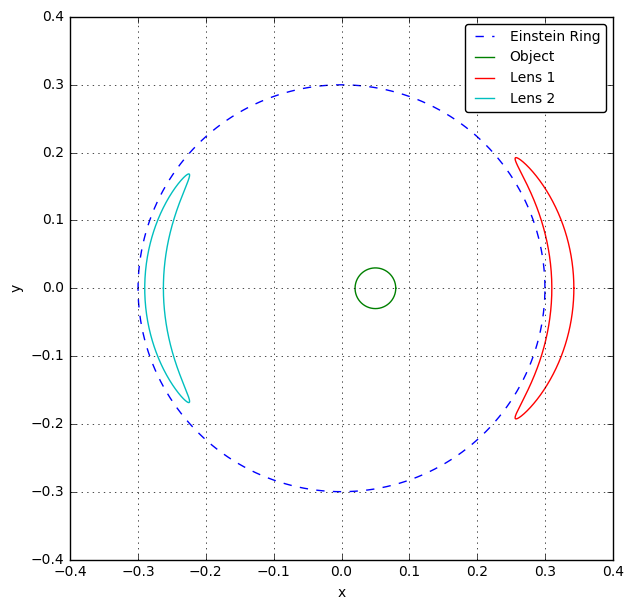

In [34]:
#Einstein radius that we calculated before
ThetaE = .3

#Position and radius of object we are observing
SX = .05
SY = 0
R0 = .03

Theta = np.linspace(0, 2*np.pi, steps)
steps = 1000

list0a = [circle(0,0,.3,phi) for phi in Theta]
list0b = [circle(SX,SY,R0,phi) for phi in Theta]
list1 = [lens1(SX, SY, R0, phi, ThetaE) for phi in Theta]
list2 = [lens2(SX, SY, R0, phi, ThetaE) for phi in Theta]

fig = plt.gcf()
fig.set_size_inches(7, 7)
pylab.xlabel('x')
pylab.ylabel('y')
pylab.axes().set_aspect('equal')
pylab.grid(True)
plt.xlim(-.4,.4)
plt.ylim(-.4,.4)
pylab.plot( *zip(*list0a), linestyle="--", label='Einstein Ring')
pylab.plot( *zip(*list0b), label='Object')
pylab.plot( *zip(*list1), label='Lens 1')
pylab.plot( *zip(*list2), label='Lens 2')
plt.legend(loc='upper right',fancybox=True, fontsize = 10)

The closer the object is to the center of the Einstein ring, the larger the lensed images become and the more circumference of the ring they cover.

### b)

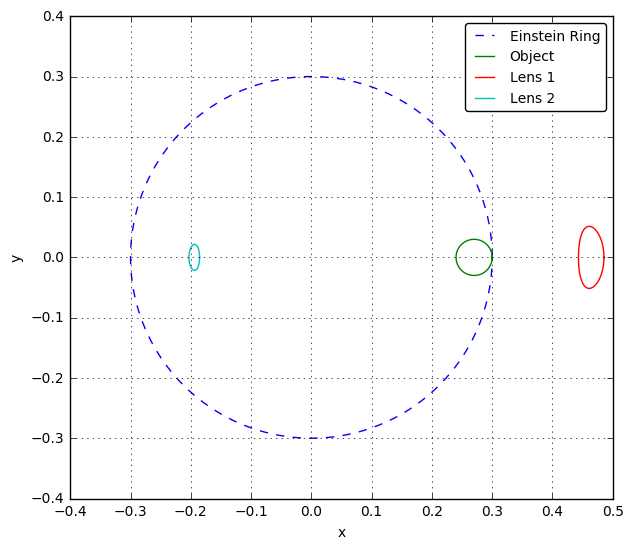

In [33]:
ThetaE = .3

#Radius and new position of object 
SX = .27
SY = 0
R0 = .03

list0a = [circle(0,0,.3,phi) for phi in Theta]
list0b = [circle(SX,SY,R0,phi) for phi in Theta]
list1 = [lens1(SX, SY, R0, phi, ThetaE) for phi in Theta]
list2 = [lens2(SX, SY, R0, phi, ThetaE) for phi in Theta]

fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.xlim(-.4,.5)
plt.ylim(-.4,.4)
pylab.xlabel('x')
pylab.ylabel('y')
pylab.axes().set_aspect('equal')
pylab.grid(True)
pylab.plot( *zip(*list0a), linestyle="--", label='Einstein Ring')
pylab.plot( *zip(*list0b), label='Object')
pylab.plot( *zip(*list1), label='Lens 1')
pylab.plot( *zip(*list2), label='Lens 2')
plt.legend(loc='upper right',fancybox=True, fontsize = 10)

When the object is just within the Einstein ring, the lensed images are much smaller than before and are farther away from the ring itself.

### Conclusion:

This program uses plotted equations for the lensed images instead of moving around pixels, so you can't really apply it to a Hubble image. However, it still gets across the same concept, and allows one to understand how gravitational lensing works. You can play around with the objects position and size, as well as the size of the Einstein radius to visually see how those parameters affect lensing and how different combinations give very different results.